In [2]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Load the pre-split data
data = joblib.load('../Results/split_data.joblib')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

print("Training and testing data loaded successfully.")
print(f"Training set size: {X_train.shape[0]}")


Training and testing data loaded successfully.
Training set size: 336


In [6]:
# Initialize the Random Forest Classifier
# random_state=42 ensures the model gives the same result every time
# class_weight='balanced' is important because our classes are not perfectly balanced
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)

# Train the model on the training data
print("Training the Random Forest model...")
rf_model.fit(X_train, y_train)
print("Model training complete.")


Training the Random Forest model...
Model training complete.


In [7]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class

print("Predictions made on the test set.")


Predictions made on the test set.


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.62      0.70      0.66        50
           1       0.46      0.38      0.42        34

    accuracy                           0.57        84
   macro avg       0.54      0.54      0.54        84
weighted avg       0.56      0.57      0.56        84


--- Confusion Matrix ---
                Predicted: 0 | Predicted: 1
Actual: 0      35            | 15           
Actual: 1      21            | 13           

ROC AUC Score: 0.5532

Plotting ROC Curve...


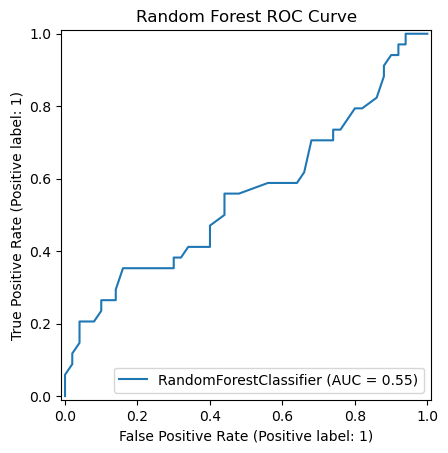

In [8]:
# Print the classification report (shows precision, recall, f1-score)
print("--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print("                Predicted: 0 | Predicted: 1")
print(f"Actual: 0      {cm[0,0]:<13} | {cm[0,1]:<13}")
print(f"Actual: 1      {cm[1,0]:<13} | {cm[1,1]:<13}")


# Calculate and print the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")

# Plot the ROC Curve
print("\nPlotting ROC Curve...")
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title('Random Forest ROC Curve')
plt.show()
